In [222]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [223]:
data = pd.read_csv('./flight_delay.csv')
data.head(100)

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0
...,...,...,...,...,...
95,SVO,2015-10-27 20:45:00,AMS,2015-10-28 00:20:00,1.0
96,SVO,2015-10-27 19:55:00,HAN,2015-10-28 04:55:00,46.0
97,SVO,2015-10-27 20:50:00,VVO,2015-10-28 05:15:00,5.0
98,SVO,2015-10-27 20:50:00,BRU,2015-10-28 00:30:00,0.0


In [224]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay,675513.0,9.912939,44.895875,0.0,0.0,0.0,5.0,1436.0


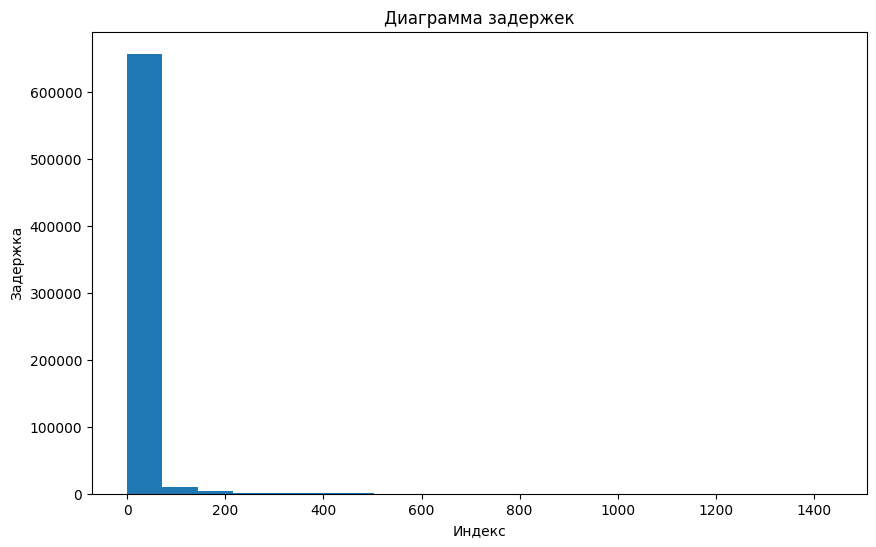

In [225]:
plt.figure(figsize=(10, 6))
plt.hist(data['Delay'], bins=20)
plt.xlabel('Индекс')
plt.ylabel('Задержка')
plt.title('Диаграмма задержек')
plt.show()

In [226]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Destination Airport'] = encoder.fit_transform(data['Destination Airport'])
data['Depature Airport'] = encoder.fit_transform(data['Depature Airport'])

scheduled_depature_array = pd.to_datetime(data['Scheduled depature time'])
scheduled_arrival_array = pd.to_datetime(data['Scheduled arrival time'])

data['depature_year'] = scheduled_depature_array.dt.year
data['depature_month'] = scheduled_depature_array.dt.month
data['depature_day'] = scheduled_depature_array.dt.day
data['depature_hour'] = scheduled_depature_array.dt.hour
data['depature_minute'] = scheduled_depature_array.dt.minute

data['arrival_year'] = scheduled_arrival_array.dt.year
data['arrival_month'] = scheduled_arrival_array.dt.month
data['arrival_day'] = scheduled_arrival_array.dt.day
data['arrival_hour'] = scheduled_arrival_array.dt.hour
data['arrival_minute'] = scheduled_arrival_array.dt.minute

data = data.drop('Scheduled depature time', axis=1)
data = data.drop('Scheduled arrival time', axis=1)

data.head(100)

,Depature Airport,Destination Airport,Delay,depature_year,depature_month,depature_day,depature_hour,depature_minute,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_minute
0,144,56,0.0,2015,10,27,7,40,2015,10,27,20,45
1,144,68,2.0,2015,10,27,9,50,2015,10,27,20,35
2,144,94,0.0,2015,10,27,10,45,2015,10,27,23,35
3,144,82,0.0,2015,10,27,12,30,2015,10,28,1,20
4,113,144,9.0,2015,10,27,14,15,2015,10,27,16,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,144,7,1.0,2015,10,27,20,45,2015,10,28,0,20
96,144,55,46.0,2015,10,27,19,55,2015,10,28,4,55
97,144,171,5.0,2015,10,27,20,50,2015,10,28,5,15
98,144,20,0.0,2015,10,27,20,50,2015,10,28,0,30


In [227]:
Q1 = data['Delay'].quantile(0.25)
Q3 = data['Delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
data = data[~((data['Delay'] < lower_bound) | (data['Delay'] > upper_bound))]

# Замена выбросов медианой
data['Delay'] = data['Delay'].fillna(data['Delay'].median())
data

,Depature Airport,Destination Airport,Delay,depature_year,depature_month,depature_day,depature_hour,depature_minute,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_minute
0,144,56,0.0,2015,10,27,7,40,2015,10,27,20,45
1,144,68,2.0,2015,10,27,9,50,2015,10,27,20,35
2,144,94,0.0,2015,10,27,10,45,2015,10,27,23,35
3,144,82,0.0,2015,10,27,12,30,2015,10,28,1,20
4,113,144,9.0,2015,10,27,14,15,2015,10,27,16,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
675507,144,168,0.0,2018,8,31,23,50,2018,9,1,1,5
675508,144,145,0.0,2018,8,31,23,50,2018,9,1,2,10
675509,83,144,0.0,2018,8,31,23,50,2018,9,1,1,10
675510,144,37,0.0,2018,8,31,23,55,2018,9,1,1,20


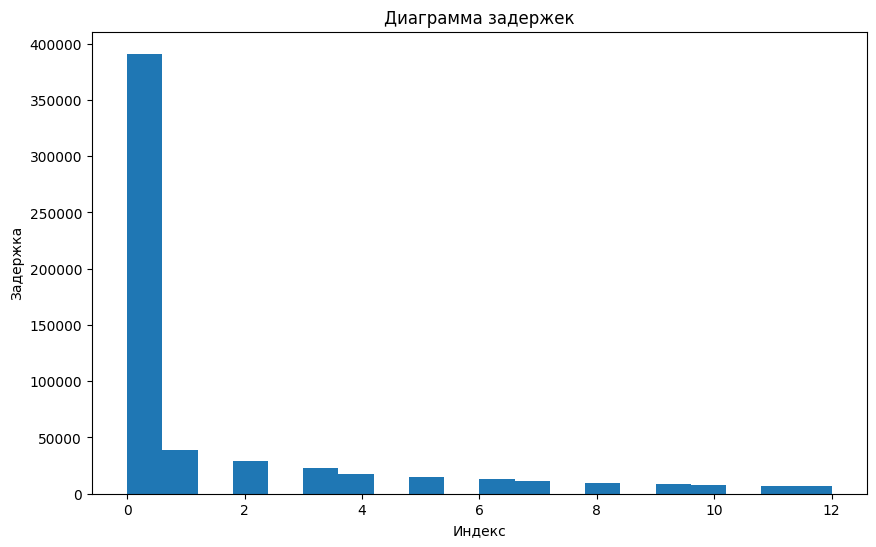

In [228]:
plt.figure(figsize=(10, 6))
plt.hist(data['Delay'], bins=20)
plt.xlabel('Индекс')
plt.ylabel('Задержка')
plt.title('Диаграмма задержек')
plt.show()

In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data.to_numpy())
data = pd.DataFrame(
    scaler.transform(data.to_numpy()),
    columns=data.columns
)
data

,Depature Airport,Destination Airport,Delay,depature_year,depature_month,depature_day,depature_hour,depature_minute,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_minute
0,0.808989,0.318182,0.000000,0.0,0.818182,0.866667,0.304348,0.727273,0.0,0.818182,0.866667,0.869565,0.762712
1,0.808989,0.386364,0.166667,0.0,0.818182,0.866667,0.391304,0.909091,0.0,0.818182,0.866667,0.869565,0.593220
2,0.808989,0.534091,0.000000,0.0,0.818182,0.866667,0.434783,0.818182,0.0,0.818182,0.866667,1.000000,0.593220
3,0.808989,0.465909,0.000000,0.0,0.818182,0.866667,0.521739,0.545455,0.0,0.818182,0.900000,0.043478,0.338983
4,0.634831,0.818182,0.750000,0.0,0.818182,0.866667,0.608696,0.272727,0.0,0.818182,0.866667,0.695652,0.677966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577035,0.808989,0.954545,0.000000,1.0,0.636364,1.000000,1.000000,0.909091,1.0,0.727273,0.000000,0.043478,0.084746
577036,0.808989,0.823864,0.000000,1.0,0.636364,1.000000,1.000000,0.909091,1.0,0.727273,0.000000,0.086957,0.169492
577037,0.466292,0.818182,0.000000,1.0,0.636364,1.000000,1.000000,0.909091,1.0,0.727273,0.000000,0.043478,0.169492
577038,0.808989,0.210227,0.000000,1.0,0.636364,1.000000,1.000000,1.000000,1.0,0.727273,0.000000,0.043478,0.338983


In [230]:
y = data['Delay']
X = data.drop('Delay', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Мульти регрессия

In [231]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

Model intercept : 0.11531951841195248
Model coefficients : [-1.40620958e-02  5.61392295e-03 -2.67770031e+02 -8.17192926e+01
 -7.33269901e+00 -1.81029270e-01  1.85869506e-04  2.67671957e+02
  8.17322815e+01  7.33532231e+00  2.33241206e-01  1.42920120e-02]


In [232]:
y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df

,Actual,Predicted
178402,0.416667,0.153682
481509,0.000000,0.101807
70294,0.000000,0.143948
254792,0.500000,0.122692
336949,0.166667,0.103706
...,...,...
378099,0.000000,0.118739
269825,0.000000,0.098869
99251,0.083333,0.128119
539217,0.000000,0.094278


In [234]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.16569153553562757
Mean Squared Error: 0.05409871937095068


#### Полиномиальная регрессия

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.15933524898946982
Mean Squared Error: 0.052135752938711165


#### Регрессия с регуляризацией (Ridge)

In [237]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df

,Actual,Predicted
178402,0.416667,0.140881
481509,0.000000,0.096522
70294,0.000000,0.129318
254792,0.500000,0.124586
336949,0.166667,0.111991
...,...,...
378099,0.000000,0.128263
269825,0.000000,0.106093
99251,0.083333,0.145836
539217,0.000000,0.115811


In [238]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.16725194035615787
Mean Squared Error: 0.05471539950138506
